# Example Notebook: Estimating Infiltration (Box 8.4 From Dingman 3rd Ed.)

Here we compare infiltration-rate calculations using the Green-and-Ampt implicit, Green-and-Ampt explicit, and Philip approaches for a constant rainfall rate of $w$ = 2 cm/hr lasting $T_w$ = 2 hr on a soil with 20% sand, 60% silt, and 20% clay and an initial water content of $\theta_0$ = 0.350. 

From figure 7.5, the soil is a silt loam; referring to figure 7.21, the soil is hydraulic class B3, and from table 7.5 we find $\phi$ = 0.413 and $K_h$ = 0.656 cm/hr. From figure 8.22 we find |$\psi_f$| = 30 cm

## Green And Ampt Method (Implicit)

Since w > Kh, there is potential for ponding, and we compute the time of ponding, $T_p$, via equation (8.31):

$$ T_p = \frac{z_f(T_p)(\phi-\theta_0)}{w} $$


In [2]:
# Import numeric python and the plotting library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Given Informaiton
kh = 0.656
psi_f = 30
phi = 0.413
initMoist = 0.350
w = 2

# time to ponding (Eq 8.31)
Tp = kh*psi_f*(phi-initMoist)/(w*(w-kh))
print('Ponding occurs at %.2f' %Tp,'hours (%.2f min)' %(Tp*60))


Ponding occurs at 0.46 hours (27.68 min)


Since $T_p$ < $T_w$ , there is ponding. The infiltration rate is constant at the rainfall rate, 2.00 cm/hr, from t = 0 to t = 0.461 hr, and the cumulative infiltration during this time is given by equation (8.23) as

$$ F(T_p) = w T_p $$

In [3]:
# Cumulative infiltration at time to Ponding (Eq 8.26)
F_Tp = w*Tp 
print('Inifiltraiton at time of ponding is %.2f cm' % F_Tp)

Inifiltraiton at time of ponding is 0.92 cm


Now we select a series of $F(t)$ values such that $F(t)$ > $F(T_p)$ and compute the corresponding $t$ values
via equation (8.36), $f(t)$ via equation (8.34), and $z_f(t)$ via equation (8.27). Also we note that the infiltration excess is simply the rainfall rate minus the infiltation rate.

nan

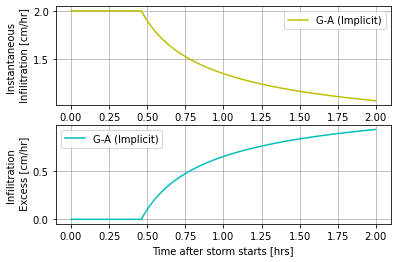

In [7]:
# List of cumulative infiltration amounts
F_list = np.arange(.01,w*2,.01)

# Time of cumulative infiltration (8.36)
t_F_list = (
    (F_list-F_Tp)/kh + 
    psi_f*(phi-initMoist)/kh *
    np.log((F_Tp+psi_f*(phi-initMoist))/(F_list+psi_f*(phi-initMoist))) +
    Tp)

# Instantianious Infiltraiton (8.34)
f_T_list = kh*(1 + psi_f*(phi-initMoist)/F_list)

# Check for time longer than storm or before Tp
f_T_list[t_F_list>2] = np.nan
f_T_list[t_F_list<=Tp] = w
t_F_list[0] = 0; f_T_list[0] = w # Set first value to f=w at t=0

# Infiltration excess
fexcess_T_list = w - f_T_list

# Plot of infiltration and its excess
plt.subplot(2,1,1)
plt.plot(t_F_list,f_T_list,'y-', label='G-A (Implicit)')
plt.legend(); plt.grid(True)
plt.ylabel('Instantaneous \n Infilitration [cm/hr]')
plt.subplot(2,1,2)
plt.plot(t_F_list,fexcess_T_list,'c-', label='G-A (Implicit)')
plt.legend(); plt.grid(True)
plt.xlabel('Time after storm starts [hrs]'); 
plt.ylabel('Infilitration \n Excess [cm/hr]')

## Green And Ampt Method (explicit approximation)

Here we calculate the infiltration rate using the explicit forms of the Green-and-Ampt relations for the same soil, storm, and initial conditions as the previous example. This is an approximation of the above implicit approach, but works fairly well.

First compute $T^*$ from equation (8.38)

$$ T^* = \frac{|\psi_f|(\phi-\theta_0)}{K_h} $$

Next we calculate the compression time as (8.39)

$$ T_c = \frac{w T_p}{K_h} - \left[\frac{|\psi_f|(\phi-\theta_0)}{K_h}\right]\ln\left[1+\frac{w T_p}{|\psi_f|(\phi-\theta_0)}\right] $$

And then we evaluate a set of times from $T_p$ to $T_w$ as

$$ t_e = t - T_p + T_c $$ 

We then calculate the instantaneous infiltration as a function of the effective time, $f(t_e)$, using equation 8.41


Characteristic time is 2.88 hours (172.87 min)
Compression time is 0.26 hours (15.66 min)


Text(0, 0.5, 'Infilitration \n Excess [cm/hr]')

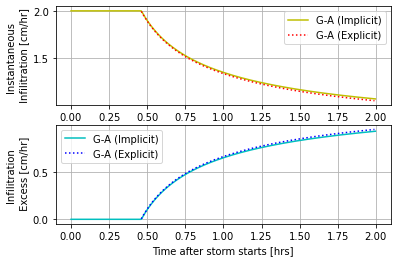

In [5]:
# time to ponding (Eq 8.31)
Tstar = psi_f*(phi-initMoist)/kh
print('Characteristic time is %.2f' %Tstar,'hours (%.2f min)' %(Tstar*60))

# Time of compression
Tc = w*Tp/kh - (psi_f*(phi-initMoist)/kh)*np.log(1+(w*Tp)/(psi_f*(phi-initMoist)))
print('Compression time is %.2f' %Tc,'hours (%.2f min)' %(Tc*60))

# Evaluation times
t_list_explict = np.arange(Tp,2,0.01)
te = t_list_explict - Tp + Tc

# Instantianious Infiltraiton (8.34)
f_T_list_explicit = kh*(0.707*((te+Tstar)/te)**0.5 + 
                        0.667 - 
                        0.236*(te/(Tstar+te))**0.5 - 
                        0.138*(te/(Tstar+te)))


# Infiltration excess
fexcess_T_list_explicit = w - f_T_list_explicit


# Plot of infiltration and its excess
plt.subplot(2,1,1)
plt.plot(t_F_list,f_T_list,'y-', label='G-A (Implicit)')
plt.plot(t_list_explict,f_T_list_explicit,'r:', label='G-A (Explicit)')
plt.legend(); plt.grid(True)
plt.ylabel('Instantaneous \n Infilitration [cm/hr]')
plt.subplot(2,1,2)
plt.plot(t_F_list,fexcess_T_list,'c-', label='G-A (Implicit)')
plt.plot(t_list_explict,fexcess_T_list_explicit,'b:', label='G-A (Explicit)')
plt.legend(); plt.grid(True)
plt.xlabel('Time after storm starts [hrs]'); 
plt.ylabel('Infilitration \n Excess [cm/hr]')


## Phillip Equation 

The Phillip Equation is an infiniite series expansion of the Richards equation for infinitely deep soils with uniform initital water contents. As you can see below, it is a more coarse approximation to the implicit Green and Ampt approach than the explicit approximation above.

Here we calculate the infiltration rate using the two-term Philip relation [equation (8.20)] with time adjustment [equations (8.21)–(8.23)] for the same soil, storm, and initial conditions as the previous example.

The sorptivity can be found via equation [8B2.4], but here we use $􏰀\psi_{ae}$ = 􏰀$\psi_f$ = 30 cm as found from figure 8.22. The value of $b$ = 5.3 for silt loams is taken from table 7.4. Thus

$$ S_p = \left[ (\phi - \theta_0) K_h |\psi_{AE}| \left(\frac{2B+3}{b+3}\right)\right]^{1/2} $$

The time parameters are then found as (eq. 8.21 and 8.22): 
$$ T_{cp} = \left(\frac{S_p}{2(w-K_h)}\right)^2$$

$$ T_{pp} = \frac{S_p T_{cp}^{1/2} + K_h T_{cp}}{w} $$

The effective time values tep used in the Philip equation are then found from equation (8.23):

$$ t_{e(p)} = t - T_{pp} + T_{cp}$$ 

These times are put into equation 8.20a as

$$ f(t) = \frac{S_p}{2}t_{e(p)}^{1/2} + k_h$$

Soil sorptivity is 1.43 cm/hr^(1/2)
Tcp = 0.28 Tpp = 0.47


Text(0, 0.5, 'Infilitration \n Excess [cm/hr]')

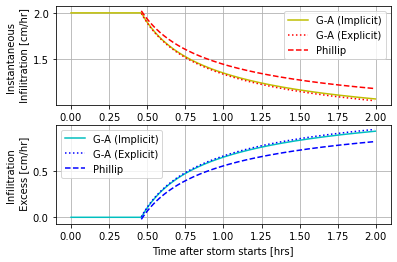

In [6]:
# soil sorptivity
psi_ae = psi_f
b = 5.3
Sp = ( (phi - initMoist) *kh * psi_ae * (2*b+3)/(b+3) )**0.5
print('Soil sorptivity is %.2f cm/hr^(1/2)' %Sp )

# Time parameters
Tcp = (Sp/(2*(w-kh)))**2
Tpp = (Sp*Tcp**0.5 + kh*Tcp)/w
print('Tcp = %.2f' %Tcp, 'Tpp = %.2f' % Tpp)

# Evaluation times
t_list_phillip = np.arange(Tp,2,0.01)
tep = t_list_phillip - Tpp + Tcp

# Instantianious Infiltraiton (8.34)
f_t_list_phillip = Sp/2 * tep**-0.5 +kh

# Infiltration excess
fexcess_T_list_phillip = w - f_t_list_phillip

# Plot of infiltration and its excess
plt.subplot(2,1,1)
plt.plot(t_F_list,f_T_list,'y-', label='G-A (Implicit)')
plt.plot(t_list_explict,f_T_list_explicit,'r:', label='G-A (Explicit)')
plt.plot(t_list_phillip,f_t_list_phillip,'r--', label='Phillip')
plt.legend(); plt.grid(True)
plt.ylabel('Instantaneous \n Infilitration [cm/hr]')
plt.subplot(2,1,2)
plt.plot(t_F_list,fexcess_T_list,'c-', label='G-A (Implicit)')
plt.plot(t_list_explict,fexcess_T_list_explicit,'b:', label='G-A (Explicit)')
plt.plot(t_list_phillip,fexcess_T_list_phillip,'b--', label='Phillip')
plt.legend(); plt.grid(True)
plt.xlabel('Time after storm starts [hrs]'); 
plt.ylabel('Infilitration \n Excess [cm/hr]')
